![banResterLivre](baniere.jpg)
# <span style="color:purple">Analyse des ventes de l'entreprise "Rester livres"</span>

A travers ce notebook, nous allons analyser un grand nombre d'indicateurs relatifs aux **ventes de la société**, à son **fichier clients** et son **catalogue produit**.
Nous allons également tenter d'établir des **corrélations entre les différents indicateurs**.

### Sommaire

[1. Evolution du chiffre d'affaires et nombre de commandes global](#ca)     
[2. Analyse par catégories de produits](#categ)         
[3. Analyse du fichier clients](#clients)      
[4. Analyse du panier clients et fidélité](#panier)     
[5. Analyse des corrélations](#corr)     

## <span style="color:#00468b" id="ca">Evolution du chiffre d'affaires et nombre de commandes global</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

df_ventes = pd.read_csv('exports/transactions_etendues.csv')
df_ventes.head()

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,10.0,4.0,2021.0,f,1977.0,4.99,0.0,avril
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,27.0,12.0,2021.0,f,1981.0,4.99,0.0,décembre
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,27.0,10.0,2021.0,m,1985.0,4.99,0.0,octobre
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,4.0,7.0,2021.0,f,1989.0,4.99,0.0,juillet
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,19.0,9.0,2021.0,m,1980.0,4.99,0.0,septembre


In [2]:
df_ca_mensuel = df_ventes[['date_year', 'date_month', 'month','session_id', 'price']].groupby(['date_year', 'date_month', 'month']).agg(['sum','nunique']).reset_index()
df_ca_mensuel['ca_mois'] = df_ca_mensuel['price']['sum']
df_ca_mensuel['cmdes_mois'] = df_ca_mensuel['session_id']['nunique']
df_ca_mensuel.drop(['session_id', 'price'], axis='columns', inplace=True)
df_ca_mensuel 

C:\Users\OpenClassrooms\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,date_year,date_month,month,ca_mois,cmdes_mois
,,,,,
0,2021.0,3.0,mars,479404.91,14203
1,2021.0,4.0,avril,473125.20,13972
2,2021.0,5.0,mai,489450.51,14169
3,2021.0,6.0,juin,481330.18,13839
4,2021.0,7.0,juillet,480939.94,13573
5,2021.0,8.0,août,479398.07,13593
6,2021.0,9.0,septembre,502895.12,14850
7,2021.0,10.0,octobre,319232.20,11553
8,2021.0,11.0,novembre,512993.37,14608


<div class="alert alert-block alert-warning">
    <b>Attention :</b> Le mois d'Octobre 2021 n'est pas représentatif car des données importantes sont manquantes.<br/>
    Nous avons décidé de l'occulter pour ne pas fausser la représentation.
</div>

In [3]:
df_ca_mensuel = df_ca_mensuel[df_ca_mensuel['date_month'] != 10]
df_ventes = df_ventes[df_ventes['date_month'] != 10]

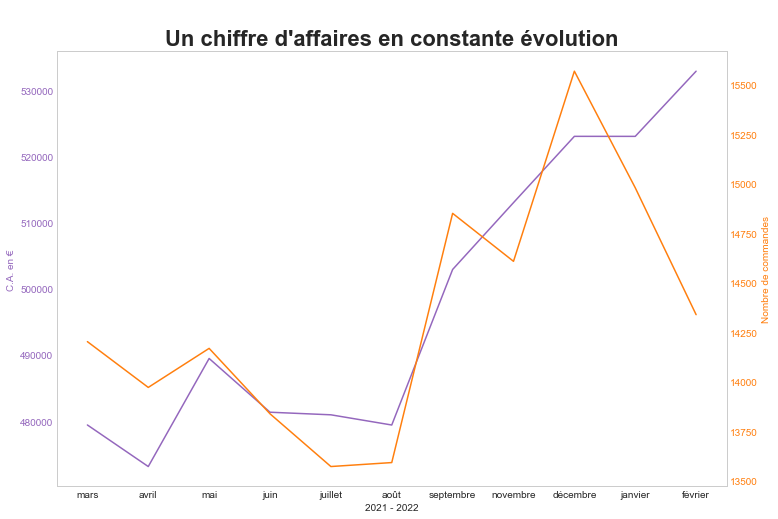

In [4]:
X = df_ca_mensuel['month']
Y1 = df_ca_mensuel['ca_mois']
Y2 = df_ca_mensuel['cmdes_mois']

fig,ax1 = plt.subplots(figsize=(12,8))

color = 'tab:purple'
ax1.set_xlabel('2021 - 2022')
ax1.set_ylabel('C.A. en €', color=color)
ax1.plot(X, Y1, color=color)
ax1.grid(False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Nombre de commandes', color=color)  # we already handled the x-label with ax1
ax2.plot(X, Y2, color=color)
ax2.grid(False)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('\nUn chiffre d\'affaires en constante évolution', 
  fontweight='bold', 
  fontsize=22)

plt.show()

#Sauvegarde en PNG
fig.savefig('graph/1_evo_ca.png')
plt.close(fig)

### Répartition des commandes par jour de la semaine.

In [5]:
df_ventes['date'] = pd.to_datetime(df_ventes['date'])
df_ventes['num_day_of_week'] = df_ventes['date'].dt.dayofweek

jours = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
df_ventes['day_of_week'] = df_ventes['num_day_of_week'].apply(lambda x: jours[x])

In [6]:
df_ventes_day = df_ventes[['num_day_of_week','day_of_week','session_id']].groupby(['session_id','num_day_of_week','day_of_week']).count().reset_index().sort_values('num_day_of_week')

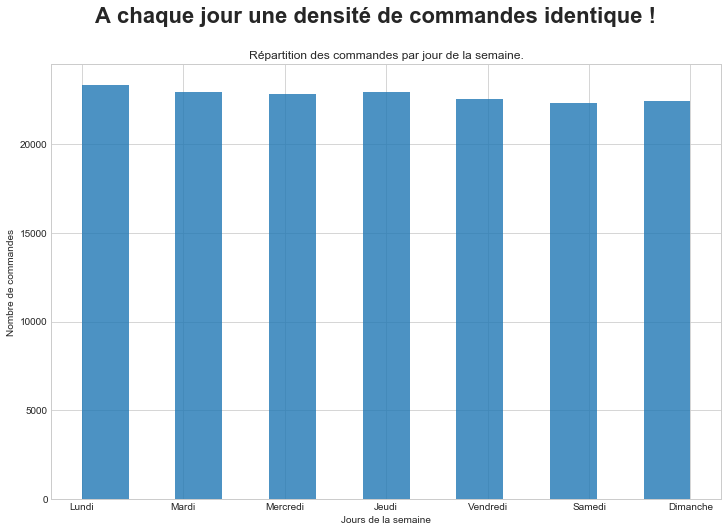

In [7]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()

plt.hist(df_ventes_day['day_of_week'], 
         density=False,
         alpha=0.8,
         bins = 13
        )
plt.suptitle('A chaque jour une densité de commandes identique !', 
  fontweight='bold', 
  fontsize=22)
plt.title('Répartition des commandes par jour de la semaine.', 
  loc='center', 
  fontsize=12)
ax = ax.set(xlabel='Jours de la semaine', ylabel='Nombre de commandes')
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/2_cmdes_jour_semaine.png')
plt.close(fig)

## <span style="color:#00468b" id="categ">Analyse par catégories de produits</span>
### Nombre de produits par catégorie

In [8]:
dist_articles = [df_ventes[df_ventes['categ'] == 0].id_prod.nunique(),
                 df_ventes[df_ventes['categ'] == 1].id_prod.nunique(),
                 df_ventes[df_ventes['categ'] == 2].id_prod.nunique()]

print("Le décompte du nombre de produits par catégorie est le suivant :\n",
      "La catégorie 0 compte", dist_articles[0], "références.\n",
      "La catégorie 1 compte", dist_articles[1], "références.\n",
      "La catégorie 2 compte", dist_articles[2], "références.\n")

Le décompte du nombre de produits par catégorie est le suivant :
 La catégorie 0 compte 2290 références.
 La catégorie 1 compte 737 références.
 La catégorie 2 compte 236 références.



### Répartition du C.A. par catégorie.

In [9]:
df_ca_categ = df_ventes[df_ventes['date_month'] != 10].groupby(['date_year', 'date_month', 'month', 'categ']).sum().reset_index()
df_ca_categ_global = df_ca_categ.groupby(['categ']).sum().reset_index()
df_ca_categ_global = df_ca_categ_global[['categ', 'price']]
df_ca_categ_global['taux'] = ((df_ca_categ_global['price'] / df_ca_categ_global['price'].sum())*100)

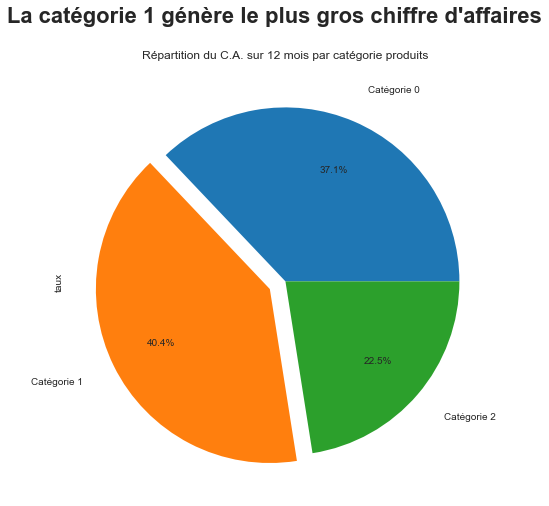

In [10]:
fig=plt.figure(figsize=(12,8))
df_ca_categ_global['taux'].plot(kind='pie',
                                labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],
                                explode = [0, 0.1, 0],
                                autopct = '%1.1f%%',
                                pctdistance = 0.7, labeldistance = 1.2)
plt.suptitle('La catégorie 1 génère le plus gros chiffre d\'affaires', 
  fontweight='bold', 
  fontsize=22)
plt.title('Répartition du C.A. sur 12 mois par catégorie produits', 
  loc='center', 
  fontsize=12)
plt.show()
#Sauvegarde en PNG
fig.savefig('graph/3_ca_par_categorie.png')
plt.close(fig)

### Evolution du C.A. par catégories de produits

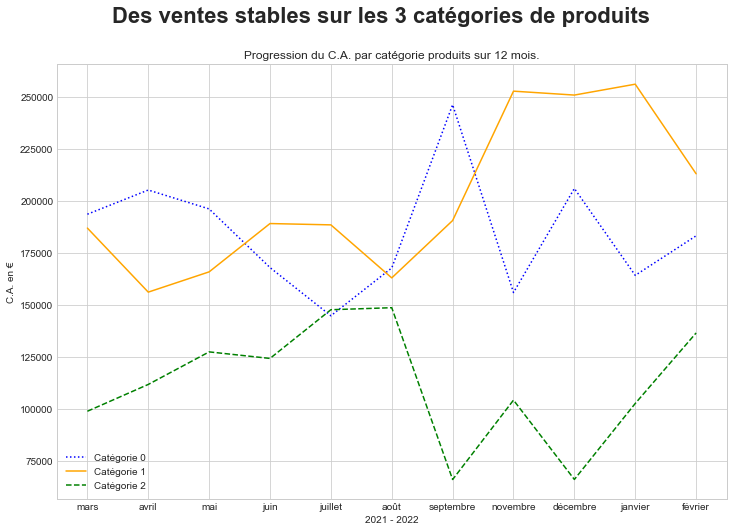

In [11]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel='2021 - 2022', ylabel='C.A. en €')
plt.suptitle('Des ventes stables sur les 3 catégories de produits', 
  fontweight='bold', 
  fontsize=22)
plt.title('Progression du C.A. par catégorie produits sur 12 mois.', 
  loc='center', 
  fontsize=12)

color_line = {0:'blue', 1:'orange', 2:'green'}
style_line = {0:'dotted', 1:'solid', 2:'dashed'}

for i in df_ca_categ['categ'].unique():
    subset = df_ca_categ[df_ca_categ['categ'] == i]
    x = subset['month']
    y = subset['price']
    plt.plot(x, y, color=color_line[i], linestyle=style_line[i], label='Catégorie '+str(int(i)))

plt.legend(loc='lower left');
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/4_evo_ca_categories.png')
plt.close(fig)

### Nombre de commandes par catégories

In [12]:
df_ventes_produits = df_ventes.groupby(['id_prod', 'categ']).agg(['count','sum','mean']).reset_index()
df_ventes_produits = df_ventes_produits[['id_prod','categ', 'price']]

In [13]:
# Preparation des données
df_ventes_produits_etendu = pd.DataFrame(columns = ['id_prod','categ','nb_ventes','ca_produit','pu_produit'])
df_ventes_produits_etendu['id_prod'] = df_ventes_produits['id_prod']
df_ventes_produits_etendu['categ'] = df_ventes_produits['categ']
df_ventes_produits_etendu['nb_ventes'] = df_ventes_produits['price']['count']
df_ventes_produits_etendu['ca_produit'] = df_ventes_produits['price']['sum']
df_ventes_produits_etendu['pu_produit'] = df_ventes_produits['price']['mean']

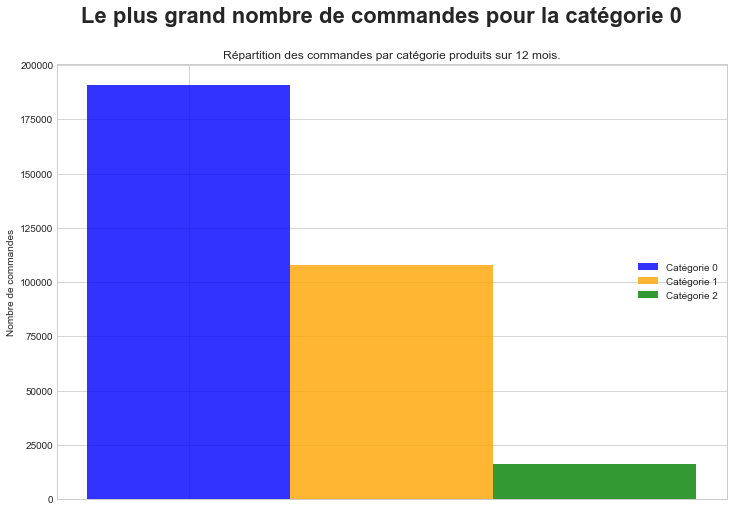

In [14]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()

subset = df_ventes_produits_etendu.groupby("categ").sum().reset_index()
barWidth = 1
y1 = subset[subset['categ'] == 0]['nb_ventes']
y2 = subset[subset['categ'] == 1]['nb_ventes']
y3 = subset[subset['categ'] == 2]['nb_ventes']
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.suptitle('Le plus grand nombre de commandes pour la catégorie 0', 
  fontweight='bold', 
  fontsize=22)
plt.title('Répartition des commandes par catégorie produits sur 12 mois.', 
  loc='center', 
  fontsize=12)
ax = ax.set(ylabel='Nombre de commandes')

plt.bar(r1, y1, width = barWidth, color = "blue", label="Catégorie 0", alpha=0.8)
plt.bar(r2, y2, width = barWidth, color = "orange", label="Catégorie 1", alpha=0.8)
plt.bar(r3, y3, width = barWidth, color = "green", label="Catégorie 2", alpha=0.8)
plt.xticks(range(len(y1)), [''])
plt.legend(loc='center right')
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/5_nb_cmdes_categories.png')   # save the figure to file
plt.close(fig)

### Répartition des tarifs par catégorie

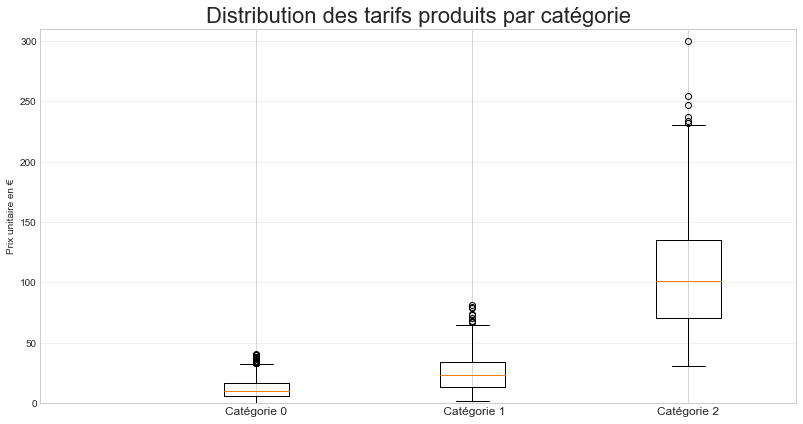

In [15]:
data_boxplot = []
append_liste = []

for cat in df_ventes_produits_etendu['categ'].unique():
    subset = df_ventes_produits_etendu[df_ventes_produits_etendu.categ == cat]
    data_boxplot.append(subset['pu_produit'])
    append_liste.append([int(cat), round(subset['pu_produit'].mean(),2),
                         round(subset['pu_produit'].median(),2),
                         round(subset['pu_produit'].std(ddof=0),2),
                         round(subset['pu_produit'].var(ddof=0),2)])
    
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
ax1.set_axisbelow(True)
ax1.set_title('Distribution des tarifs produits par catégorie', fontsize=22)
ax1.set_ylabel('Prix unitaire en €')
ax1.set_xlim(0, len(data_boxplot) + 0.5)
top = 310
bottom = 0
ax1.set_ylim(bottom, top)
plot_legend = ['Catégorie 0', ' Catégorie 1', 'Catégorie 2']
ax1.set_xticklabels(plot_legend, fontsize=12)

plt.show()

#Sauvegarde en PNG
fig.savefig('graph/6_distri_tarifs_categories.png')   # save the figure to file
plt.close(fig)

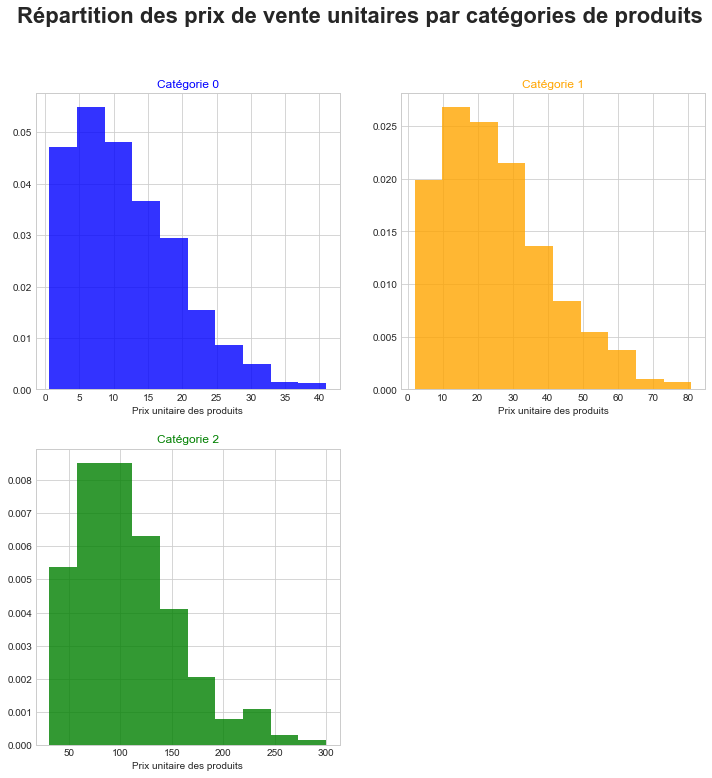

In [16]:
fig = plt.figure(figsize = (12, 12))
for cat in df_ventes_produits_etendu['categ'].unique():
    n = 221 + int(cat)
    colorPlot = {0:'blue', 1:'orange',2:'green'}
    ax1 = plt.subplot(n)
    ax1.set_title('Catégorie '+str(int(cat)), fontsize=12, color=colorPlot[cat])
    ax1.set(xlabel='Prix unitaire des produits')
    subset_categ = df_ventes_produits_etendu[df_ventes_produits_etendu['categ'] == cat]
    subset_categ['pu_produit'].hist(density=True, color=colorPlot[cat], alpha=0.8)
    
plt.suptitle('Répartition des prix de vente unitaires par catégories de produits', 
  fontweight='bold', 
  fontsize=22)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/7_repartition_tarifs_categories.png')   # save the figure to file
plt.close(fig)

In [17]:
list_tendances = pd.DataFrame(append_liste, columns = ["Catégorie","Moyenne prix","Médiane","Ecart type","Variance"])
list_tendances

,Catégorie,Moyenne prix,Médiane,Ecart type,Variance
0,0,11.72,10.32,7.53,56.63
1,1,25.50,22.99,15.42,237.93
2,2,107.64,101.25,49.15,2415.83


<div class="alert alert-block alert-info">
    <b>Info :</b> Les écarts de prix à l'intérieur des catégories sont importants, l'écart type et la variance empirique sont élevés, la dispersion est importante. On remarque cependant que les tarifs moyens augmentent de catégorie en catégorie.<br/>
    <b>La catégorie 1, milieu de gamme, génère le plus gros du C.A. mais c'est la catégorie 0, la moins chère qui déclenche le plus de commandes clients.</b>
</div>

## <span style="color:#00468b" id="clients">Analyse du fichier clients</span>
### Top 10 clients

In [18]:
df_ventes.groupby(['client_id']).sum().reset_index()[['client_id','price']].sort_values('price', ascending=False).head(10)

,client_id,price
677,c_1609,150729.07
4387,c_4958,137151.48
6336,c_6714,69402.81
2723,c_3454,52741.32
7790,c_8026,2434.82
7119,c_7421,2406.17
7005,c_7319,2366.20
2513,c_3263,2346.34
8193,c_8392,2332.08
2108,c_2899,2313.54


<div class="alert alert-block alert-warning">
    <b>Attention :</b> Les 4 premiers clients génèrent un C.A.annuel très élevé.<br/>
    Il s'agit sans doute de clients professionnels. <b>Ces Outliers seront exclus des analyses</b> pour ne pas fausser les résultats et pour concentrer l'analyse sur les clients "particuliers".
</div>

In [19]:
liste_clients_exclus = ['c_1609','c_4958','c_6714','c_3454']
df_ventes = df_ventes[df_ventes['client_id'].isin(liste_clients_exclus) == False]

### Répartition des transactions par tranches d'âge.

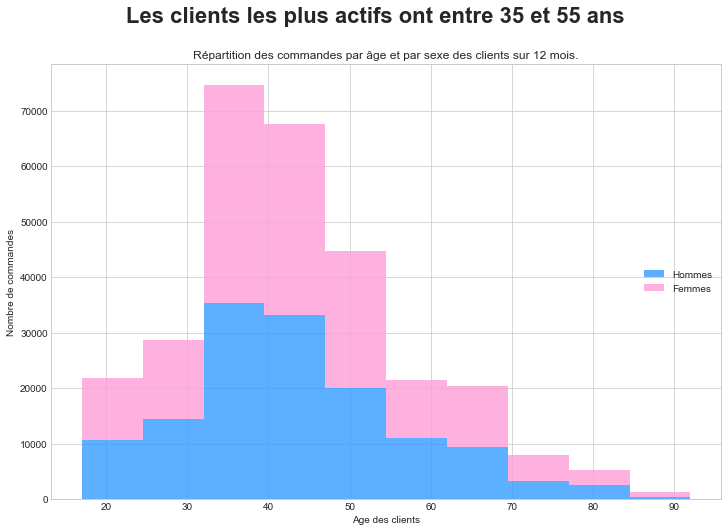

In [20]:
# On calcule l'âge du client sur l'année 2021 uniquement pour éviter de fausser le jeu avec 2 âges différents par client.
df_ventes['age_client'] = (2021 - df_ventes['birth'])

age_hommes_transac = df_ventes[df_ventes['sex']=='m']['age_client']
age_femmes_transac = df_ventes[df_ventes['sex']=='f']['age_client']

fig=plt.figure(figsize=(12,8))
ax = plt.axes()

plt.hist([age_hommes_transac,age_femmes_transac], 
         color=['#339CFF','#FE9ED7'], 
         label = ['Hommes','Femmes'],
         stacked=True, density=False, alpha=0.8
        )
plt.suptitle('Les clients les plus actifs ont entre 35 et 55 ans', 
  fontweight='bold', 
  fontsize=22)
plt.title('Répartition des commandes par âge et par sexe des clients sur 12 mois.', 
  loc='center', 
  fontsize=12)
plt.legend(loc='center right')
ax = ax.set(xlabel='Age des clients', ylabel='Nombre de commandes')
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/8_commandes_age_clients.png')
plt.close(fig)

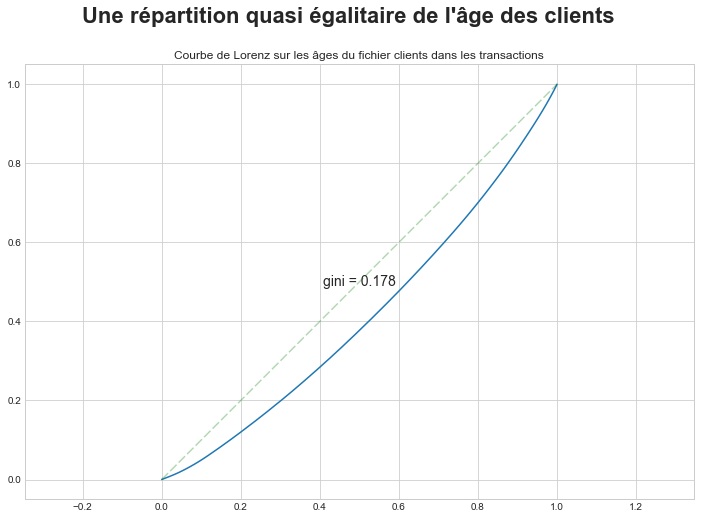

In [21]:
ages_client = df_ventes['age_client'].values

n = len(ages_client) # Taille de l'échantillon
lorenz = np.cumsum(np.sort(ages_client)) / ages_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S

fig=plt.figure(figsize=(12,8))
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(np.arange(0,1.2,0.2),np.arange(0,1.2,0.2), color='green', dashes=[6, 2], alpha=0.3)

plt.text(0.5,0.5,('gini = '+ str(round(gini,3))),horizontalalignment='center',
     verticalalignment='center', fontsize=14)

plt.suptitle("Une répartition quasi égalitaire de l'âge des clients", 
  fontweight='bold', 
  fontsize=22)
plt.title('Courbe de Lorenz sur les âges du fichier clients dans les transactions', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/9_lorenz_age_clients.png')
plt.close(fig)

<div class="alert alert-block alert-info">
    <b>Info :</b> La tranche des 40 à 50 ans est la plus représentée dans les transactions enregistrées sur l'année.<br/>
    En revanche, on remarque que la proportion hommes / femmes est à quasi égalité tout comme la répartition des âges dans le fichier transactions.
</div>

Nous allons créer **3 tranches d'âges** pour affiner les analyses.
- jusqu'à 35 ans
- 35 à 55 ans
- plus de 55 ans

In [22]:
df_ventes['tranche_age'] = np.where(df_ventes.age_client < 35, 'Moins de 35 ans', 
                                    np.where(df_ventes.age_client > 55, 'Plus de 55 ans', '35 à 55 ans')) 

In [23]:
df_ventes.head()

,id_prod,date,session_id,client_id,date_day,date_month,date_year,sex,birth,price,categ,month,num_day_of_week,day_of_week,age_client,tranche_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,10.0,4.0,2021.0,f,1977.0,4.99,0.0,avril,5,Samedi,44.0,35 à 55 ans
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,27.0,12.0,2021.0,f,1981.0,4.99,0.0,décembre,0,Lundi,40.0,35 à 55 ans
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,4.0,7.0,2021.0,f,1989.0,4.99,0.0,juillet,6,Dimanche,32.0,Moins de 35 ans
23,0_1483,2021-11-13 02:04:21.760392,s_118789,c_868,13.0,11.0,2021.0,m,1975.0,4.99,0.0,novembre,5,Samedi,46.0,35 à 55 ans
24,0_1483,2021-05-26 02:34:39.701463,s_39596,c_868,26.0,5.0,2021.0,m,1975.0,4.99,0.0,mai,2,Mercredi,46.0,35 à 55 ans


### Sexe des clients par catégorie produits.

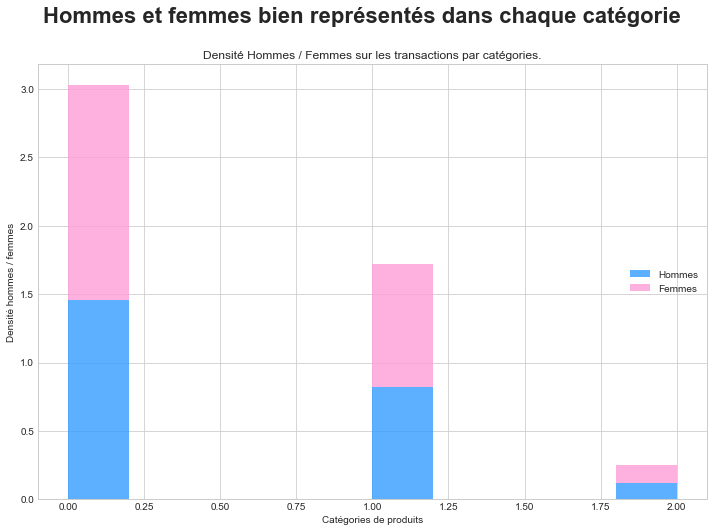

In [24]:
hommes_categ = df_ventes[df_ventes['sex']=='m']['categ']
femmes_categ = df_ventes[df_ventes['sex']=='f']['categ']

fig=plt.figure(figsize=(12,8))
ax = plt.axes()

plt.hist([hommes_categ,femmes_categ],
         color=['#339CFF','#FE9ED7'], 
         label = ['Hommes','Femmes'],
         stacked=True, density=True, alpha=0.8
        )

plt.suptitle('Hommes et femmes bien représentés dans chaque catégorie', 
  fontweight='bold', 
  fontsize=22)
plt.title('Densité Hommes / Femmes sur les transactions par catégories.', 
  loc='center', 
  fontsize=12)
plt.legend(loc='center right')
ax = ax.set(xlabel='Catégories de produits', ylabel='Densité hommes / femmes')
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/10_commandes_sexes_categories.png')
plt.close(fig)

<div class="alert alert-block alert-info">
    <b>Info :</b> La répartition hommes / femmes par catégorie de produits est quasi égalitaire elle aussi.<br/>
    Nous vérifierons la corrélation entre les 2 variables ensuite.
</div>

## <span style="color:#00468b" id="panier">Analyse du panier clients et fidélité</span>
### Evolution du panier moyen mensuel.

In [25]:
# Création du dataframe par session (commande) pour calculer le panier moyen
df_sessions = df_ventes[df_ventes['date_month'] != 10].groupby(['session_id', 'client_id', 'sex', 'birth', 'age_client','tranche_age','date_month','month','date_year']).sum().reset_index()
df_sessions = df_sessions[['session_id','client_id','sex','birth','age_client','tranche_age','date_month','month','date_year','price']].sort_values(['date_year', 'date_month'])

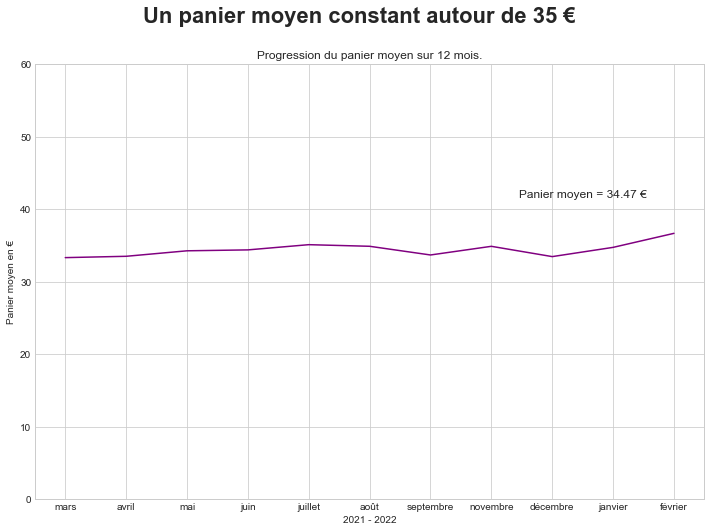

In [26]:
df_sessions_mensuel = df_sessions.groupby('month').mean().reset_index().sort_values(['date_year', 'date_month'])

fig=plt.figure(figsize=(12,8))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel='2021 - 2022', ylabel='Panier moyen en €')

plt.plot(df_sessions_mensuel['month'], df_sessions_mensuel['price'], color="purple")
plt.text(8.5,42,('Panier moyen = '+ str(round(df_sessions_mensuel['price'].mean(),2)) + ' €'),horizontalalignment='center',
     verticalalignment='center', fontsize=12)
plt.yticks(np.arange(start=0, stop=70, step=10))
plt.suptitle('Un panier moyen constant autour de 35 €', 
  fontweight='bold', 
  fontsize=22)
plt.title('Progression du panier moyen sur 12 mois.', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/11_panier_moyen_mensuel.png')
plt.close(fig)

### Répartition du panier par âge des clients.

In [27]:
df_session_clients = df_sessions.groupby(['client_id','sex','birth','age_client','tranche_age']).agg(['count','mean']).reset_index()[['client_id','sex','birth','age_client','tranche_age','price']]
df_session_clients['nb_cmdes'] = df_session_clients['price']['count']
df_session_clients['panier_moyen'] = df_session_clients['price']['mean']
df_session_clients.drop('price', axis='columns', inplace=True)

C:\Users\OpenClassrooms\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


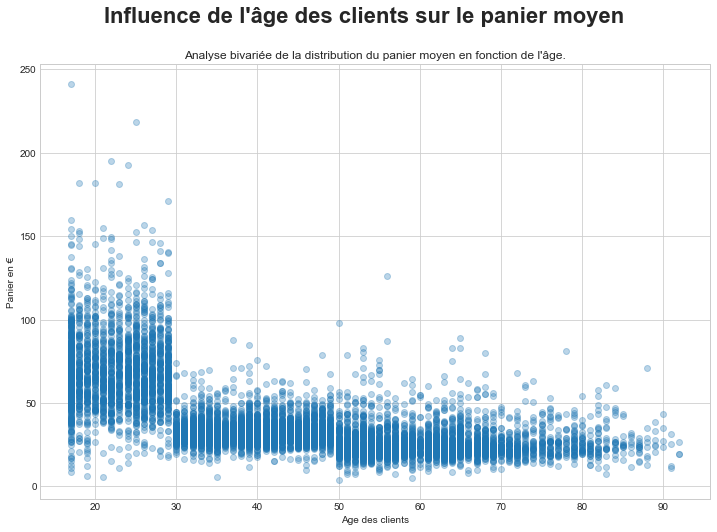

In [28]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel='Age des clients', ylabel='Panier en €')

plt.plot(df_session_clients['age_client'], df_session_clients['panier_moyen'], 'o', alpha=0.3)
plt.suptitle('Influence de l\'âge des clients sur le panier moyen', 
  fontweight='bold', 
  fontsize=22)
plt.title('Analyse bivariée de la distribution du panier moyen en fonction de l\'âge.', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/12_panier_par_age_clients.png')
plt.close(fig)

<div class="alert alert-block alert-warning">
    <b>Attention :</b> La concentration de données est trop importante pour évaluer correctement une tendance avec ce scatter plot. Il faudrait éventuellement créer un sous-échantillon aléatoire mais qui ne serait sans doute pas totalement représentatif du jeu de données complet.
</div>

Nous pouvons tenter de représenter ces valeurs différemment par tranche d'âges *(discretisation)* :

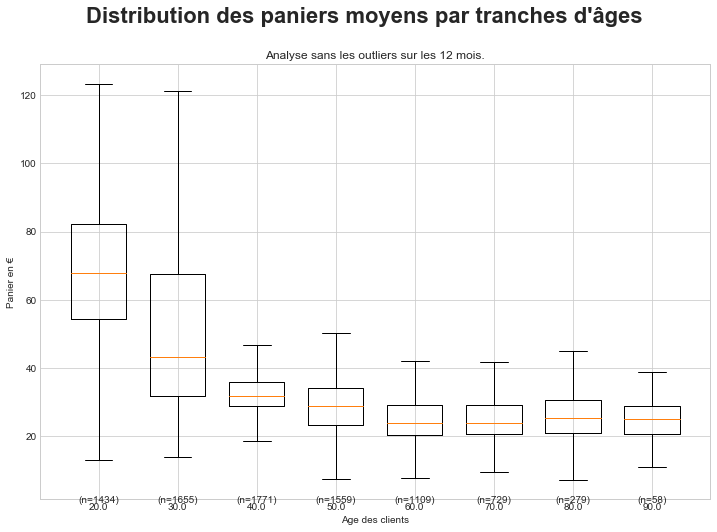

In [29]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel='Age des clients', ylabel='Panier en €')

taille_classe = 10
groupes = []

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches_age = np.arange(0, max(df_session_clients['age_client']), taille_classe)
tranches_age += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(df_session_clients['age_client'], tranches_age) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches_age): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants_panier = df_session_clients.loc[indices==ind,"panier_moyen"] # sélection des individus de la tranche ind
    if len(montants_panier) > 0:
        g = {
            'valeurs': montants_panier,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants_panier),
            'quartiles': [np.percentile(montants_panier,p) for p in [25,50,75]]
        }
        groupes.append(g)

# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7, # largeur graphique des boxplots
)
plt.suptitle("Distribution des paniers moyens par tranches d'âges", 
  fontweight='bold', 
  fontsize=22)
plt.title('Analyse sans les outliers sur les 12 mois.', 
  loc='center', 
  fontsize=12)

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='bottom')
    
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/13_distri_panier_par_age_clients.png')
plt.close(fig)

In [30]:
# Analyse des moyennes par tranches d'âges.
df_session_clients[['tranche_age','age_client','nb_cmdes','panier_moyen']].groupby('tranche_age').mean().reset_index()

,tranche_age,age_client,nb_cmdes,panier_moyen
,,,,
0,35 à 55 ans,44.680451,21.172354,31.346816
1,Moins de 35 ans,25.023956,12.149563,60.217961
2,Plus de 55 ans,66.195896,17.753298,26.313067


<div class="alert alert-block alert-info">
    <b>Info :</b> La tendance précédente se confirme. <b>Les paniers sont plus élevés pour les tranches d'âges les plus jeunes</b>.<br/>
    La tranche d'âge des clients a donc une influence sur le panier moyen.
</div>

### Fidélité des clients.
Nous allons ici étudier la récurrence des commandes clients. Combien de commandes passent nos clients par an ? Sont-ils fidèles à notre enseigne ?

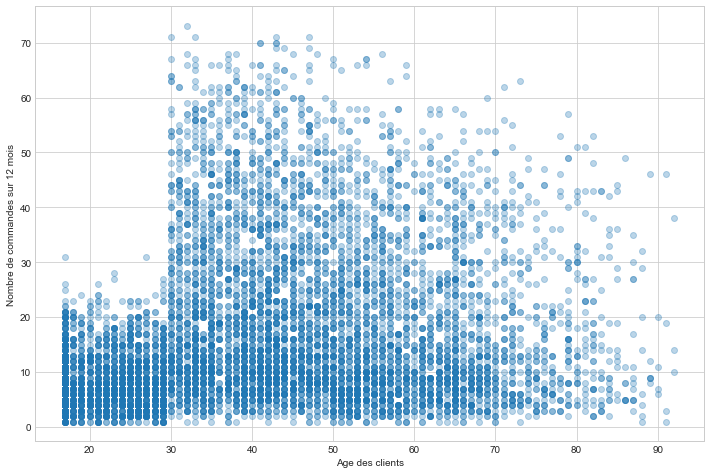

In [31]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel='Age des clients', ylabel='Nombre de commandes sur 12 mois')

plt.plot(df_session_clients['age_client'], df_session_clients['nb_cmdes'], 'o', alpha=0.3)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Attention :</b> La concentration de données est trop importante pour évaluer correctement une tendance avec ce scatter plot. Nous allons réaliser une <b>droite de régression linéaire pour vérifier s'il y a une correlation entre l'âge du client et le nombre de commandes</b> passées sur 12 mois.
</div>

In [32]:
import statsmodels.api as sm

Y = df_session_clients['nb_cmdes']
X = df_session_clients[['age_client']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age_client'],result.params['intercept']

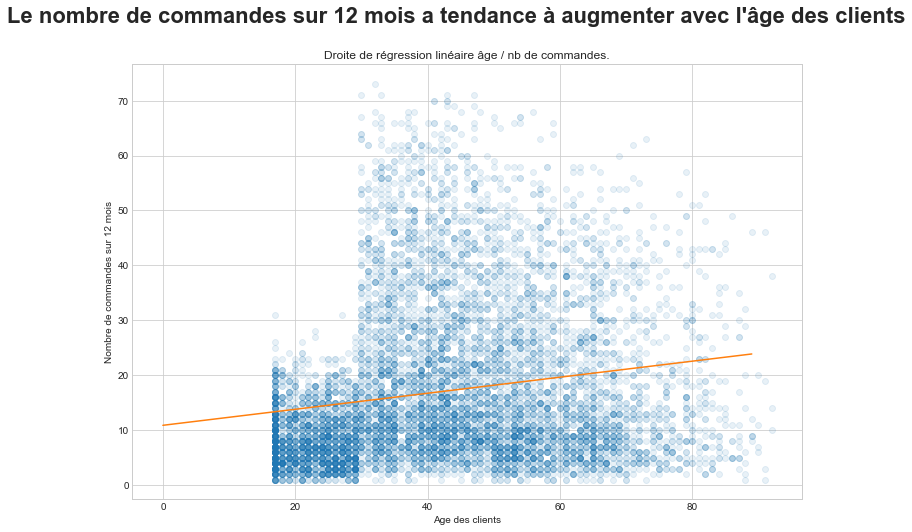

In [33]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes()
# Titres des axes
ax = ax.set(xlabel='Age des clients', ylabel='Nombre de commandes sur 12 mois')

plt.plot(df_session_clients['age_client'], df_session_clients['nb_cmdes'], 'o', alpha=0.1)
plt.plot(np.arange(90),[a*x+b for x in np.arange(90)])

plt.suptitle("Le nombre de commandes sur 12 mois a tendance à augmenter avec l'âge des clients", 
  fontweight='bold', 
  fontsize=22)
plt.title('Droite de régression linéaire âge / nb de commandes.', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/14_correlation_age_nb_cmdes.png')
plt.close(fig)

Analysons à présent le **taux de clients "one shot" comparé aux clients fidèles** :

In [34]:
pie_fid = []
pie_fid.append(int(df_session_clients[df_session_clients['nb_cmdes'] == 1].client_id.count()))
pie_fid.append(int(df_session_clients[df_session_clients['nb_cmdes'] > 1].client_id.count()))

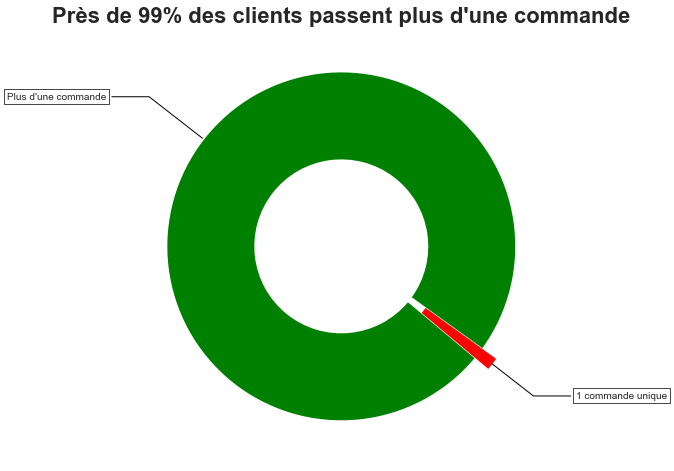

In [35]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

labels = ["1 commande unique",
          "Plus d'une commande"]

colors = ['red','green']

wedges, texts = ax.pie(pie_fid, wedgeprops=dict(width=0.5), startangle=-40, explode=(0.1,0), colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Près de 99% des clients passent plus d'une commande", fontweight='bold', fontsize=22)

plt.show()

#Sauvegarde en PNG
fig.savefig('graph/15_clients_fidelite.png')
plt.close(fig)

### Combien de commandes par an ?

In [36]:
df_taux_nb_cmdes = pd.DataFrame(columns = ['tranche','count'])
for i in np.arange(0,max(df_session_clients['nb_cmdes']),5):
    df_taux_nb_cmdes.loc[i] = [(str(i) + ' à ' + str(i+5) + ''), df_session_clients[(df_session_clients['nb_cmdes'] >= i) & (df_session_clients['nb_cmdes'] < i+5)].client_id.count()]
df_taux_nb_cmdes.reset_index()
total_cmdes = df_taux_nb_cmdes['count'].sum()
df_taux_nb_cmdes['taux'] = ((df_taux_nb_cmdes['count']/total_cmdes)*100)

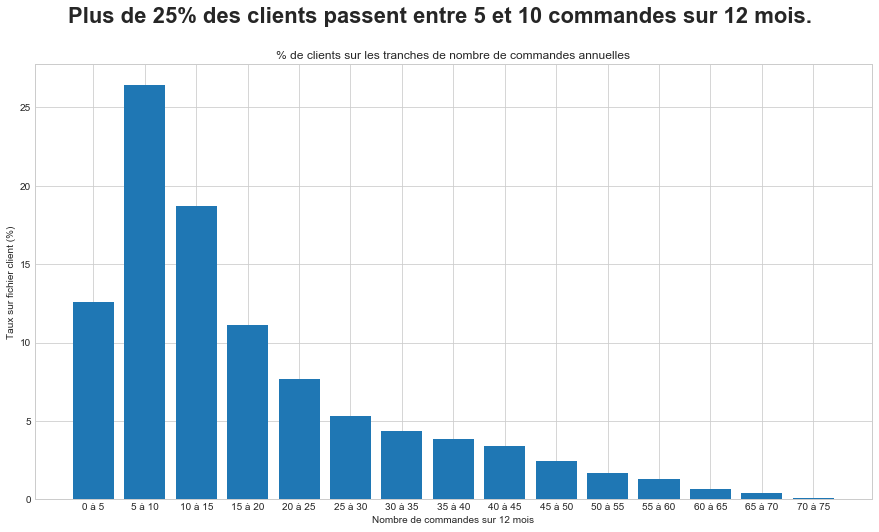

In [37]:
fig=plt.figure(figsize=(15,8))
ax = plt.axes()
ax = ax.set(xlabel='Nombre de commandes sur 12 mois', ylabel='Taux sur fichier client (%)')

plt.bar(df_taux_nb_cmdes['tranche'], df_taux_nb_cmdes['taux'])
plt.suptitle("Plus de 25% des clients passent entre 5 et 10 commandes sur 12 mois.", 
  fontweight='bold', 
  fontsize=22)
plt.title('% de clients sur les tranches de nombre de commandes annuelles', 
  loc='center', 
  fontsize=12)

plt.show()
#Sauvegarde en PNG
fig.savefig('graph/16_taux_clients_fidelite.png')
plt.close(fig)

### Répartition du C.A. par client.
Nous allons ici étudier la répartition du C.A. par client afin de voir si celle-ci est égalitaire ou si elle tend vers une règle de type 80-20.
Pour cela, nous utiliserons la courbe de Lorenz et l'indice de Gini sur le jeu de données non filtré.

In [38]:
df_session_clients['ca_cumul'] = (df_session_clients['nb_cmdes']*df_session_clients['panier_moyen'])
df_session_clients.head()

,client_id,sex,birth,age_client,tranche_age,nb_cmdes,panier_moyen,ca_cumul
,,,,,,,,
0,c_1,m,1955.0,66.0,Plus de 55 ans,14,20.904286,292.66
1,c_10,m,1956.0,65.0,Plus de 55 ans,16,36.636250,586.18
2,c_100,m,1992.0,29.0,Moins de 35 ans,3,74.290000,222.87
3,c_1000,f,1966.0,55.0,35 à 55 ans,40,23.201250,928.05
4,c_1001,m,1982.0,39.0,35 à 55 ans,21,48.079524,1009.67


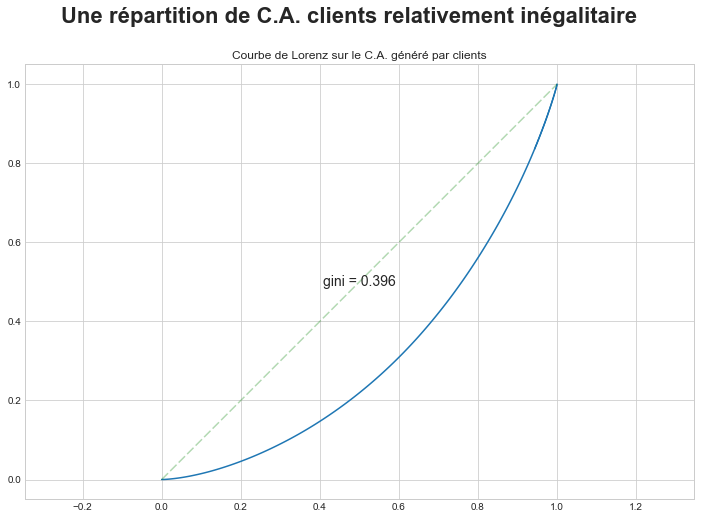

In [39]:
ca_client = df_session_clients['ca_cumul'].values

n = len(ca_client) # Taille de l'échantillon
lorenz = np.cumsum(np.sort(ca_client)) / ca_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S

fig=plt.figure(figsize=(12,8))
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(np.arange(0,1.2,0.2),np.arange(0,1.2,0.2), color='green', dashes=[6, 2], alpha=0.3)

plt.text(0.5,0.5,('gini = '+ str(round(gini,3))),horizontalalignment='center',
     verticalalignment='center', fontsize=14)

plt.suptitle("Une répartition de C.A. clients relativement inégalitaire", 
  fontweight='bold', 
  fontsize=22)
plt.title('Courbe de Lorenz sur le C.A. généré par clients', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/17_lorenz_ca_clients.png')
plt.close(fig)

<div class="alert alert-block alert-info">
    <b>Info :</b> Sur ce graphique, on remarque que la répartition du C.A. par clients est relativement inégalitaire.<br/>
    Le <b>coefficient de Gini est ici égal à 0.396</b>. Il serait égal à 0 dans une situation d'égalité parfaite et 1 dans une situation d'inégalité extrême.
</div>

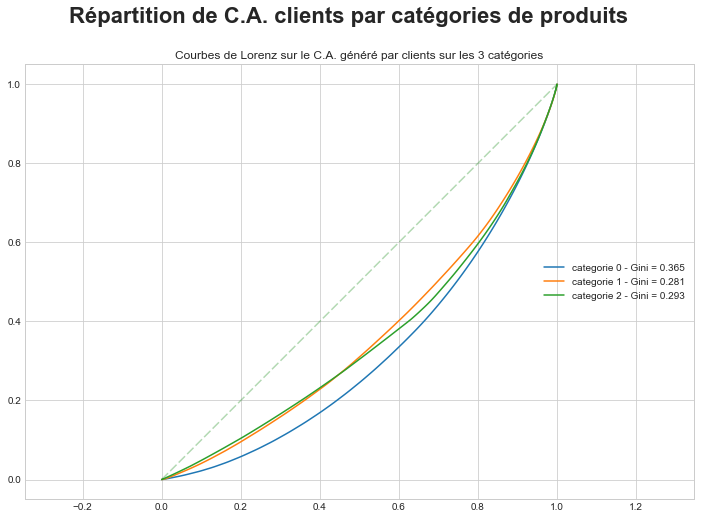

In [40]:
df_lorenz_categ = df_ventes[['session_id','categ','price']].groupby(['session_id','categ']).sum().reset_index()
fig, ax = plt.subplots(figsize=(12,8))
ax.axis('equal')

for cat in df_lorenz_categ['categ'].unique():
    ca_categ = df_lorenz_categ[df_lorenz_categ['categ'] == cat]['price'].values
    n = len(ca_categ)
    lorenz = np.cumsum(np.sort(ca_categ)) / ca_categ.sum()
    lorenz = np.append([0],lorenz) 

    # Calcul de l'indice de Gini
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
    S = 0.5 - AUC 
    gini = 2*S
    
    xaxis = np.linspace(0-1/n,1+1/n,n+1)
    ax.plot(xaxis,lorenz,drawstyle='steps-post', label = "categorie "+ str(int(cat)) + " - Gini = " + str(round(gini,3)))

plt.plot(np.arange(0,1.2,0.2),np.arange(0,1.2,0.2), color='green', dashes=[6, 2], alpha=0.3)
plt.legend(loc='center right')
plt.suptitle("Répartition de C.A. clients par catégories de produits", 
  fontweight='bold', 
  fontsize=22)
plt.title('Courbes de Lorenz sur le C.A. généré par clients sur les 3 catégories', 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/18_lorenz_ca_categ.png')
plt.close(fig)

## <span style="color:#00468b" id="corr">Analyse des corrélations</span>

La fonction .corr de Pandas peut déjà nous donner un premier aperçu des corrélations sur le dataset.

In [41]:
df_session_clients.corr('pearson')

,,birth,age_client,nb_cmdes,panier_moyen,ca_cumul
,,,,,,
birth,,1.000000,-1.000000,-0.174567,0.627149,0.181027
age_client,,-1.000000,1.000000,0.174567,-0.627149,-0.181027
nb_cmdes,,-0.174567,0.174567,1.000000,-0.321535,0.830171
panier_moyen,,0.627149,-0.627149,-0.321535,1.000000,0.137568
ca_cumul,,0.181027,-0.181027,0.830171,0.137568,1.000000


### Sexe des clients et catégories de produits commandés
Vérifions s'il y a une correlation sexe / catégorie produits avec un **tableau de contingence** et le test du **$\chi^2$** :

In [42]:
tab_cont = df_ventes[['sex','categ']].pivot_table(index='sex', columns='categ', aggfunc=len,margins=True,margins_name="Total")
tab_cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,92331,52993,7575,152899
m,85525,48061,7123,140709
Total,177856,101054,14698,293608


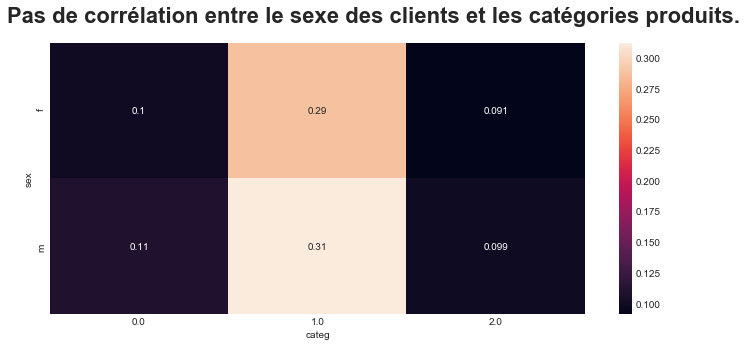

In [43]:
tx = tab_cont.loc[:,["Total"]]
ty = tab_cont.loc[["Total"],:]
n = len(df_ventes)
indep = tx.dot(ty) / n

c = tab_cont.fillna(0)
measure = (c-indep)**2/indep

xi_n = measure.sum().sum()
table = measure/xi_n

fig = plt.figure(figsize = (12,5))
sns.heatmap(table.iloc[:-1,:-1],annot=True)

plt.suptitle("Pas de corrélation entre le sexe des clients et les catégories produits.", 
  fontweight='bold', 
  fontsize=22)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/19_contingence_sexes_categories.png')
plt.close(fig)

In [44]:
import scipy.stats as st
# Calcul du Chi-2 avec scipy stats
st_chi2_a, st_p_a, st_dof_a, st_exp_a = st.chi2_contingency(tab_cont)

In [45]:
# Affichage de la pvalue calculée.
# Attention 0 attendu
st_p_a

0.17552011318811223

In [46]:
st_chi2_a

8.965632630745457

<div class="alert alert-block alert-info">
    <b>Info :</b> On s'aperçoit ici que le sexe des clients n'influe pas sur la catégorie de produits commandée.<br/>
    Les tests de <em><b>Chi-2</b></em> indiquent une indépendance marquée, il n'y a donc pas de corrélation entre ces 2 variables. Les hommes et les femmes achètent de la même manière chacune des 3 catégories.
</div>

### Age des clients / montant total des achats.

In [47]:
df_session_clients.head()

,client_id,sex,birth,age_client,tranche_age,nb_cmdes,panier_moyen,ca_cumul
,,,,,,,,
0,c_1,m,1955.0,66.0,Plus de 55 ans,14,20.904286,292.66
1,c_10,m,1956.0,65.0,Plus de 55 ans,16,36.636250,586.18
2,c_100,m,1992.0,29.0,Moins de 35 ans,3,74.290000,222.87
3,c_1000,f,1966.0,55.0,35 à 55 ans,40,23.201250,928.05
4,c_1001,m,1982.0,39.0,35 à 55 ans,21,48.079524,1009.67


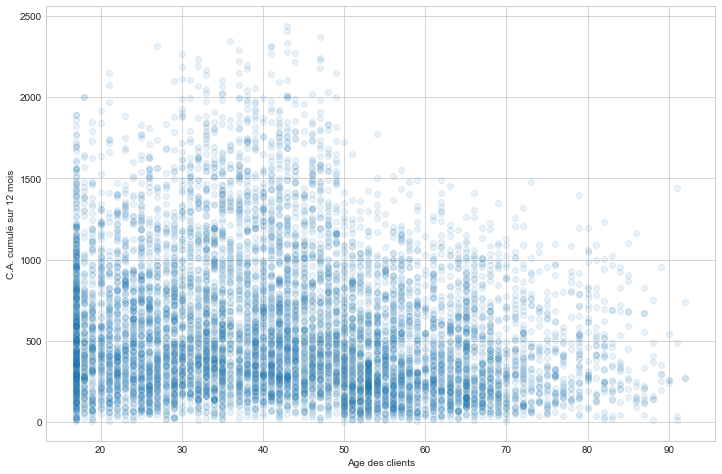

In [48]:
# 2 variables quantitatives donc en premier lieu, afficher le nuage de point
fig=plt.figure(figsize=(12,8))
ax = plt.axes()
ax = ax.set(xlabel='Age des clients', ylabel='C.A. cumulé sur 12 mois')

plt.plot(df_session_clients['age_client'], df_session_clients['ca_cumul'], 'o', alpha=0.1)
plt.show()

In [66]:
# Calcul des coeff de régression linéaire
r = st.pearsonr(df_session_clients['age_client'], df_session_clients['ca_cumul'])[0]
print('r =',r, 'r² =', (r**2))

r = -0.18102737041151426 r² = 0.03277090883810759


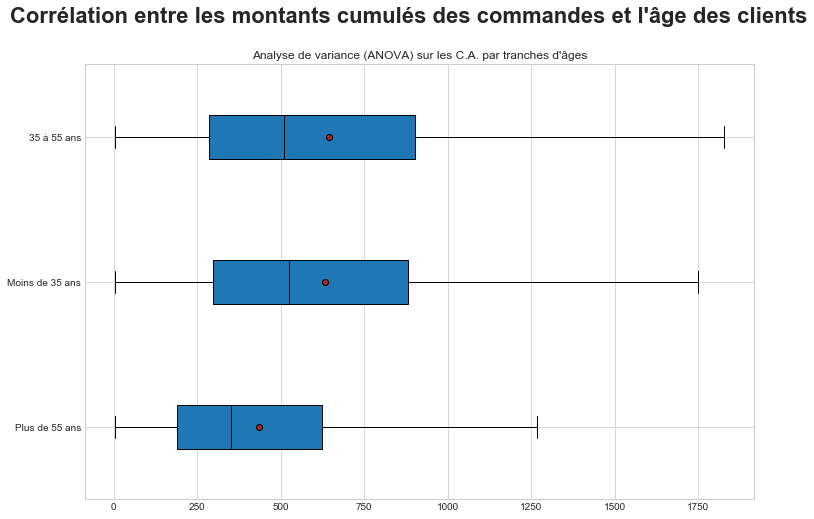

In [49]:
X = 'tranche_age' # Qualitative
Y = 'ca_cumul' # Quantitative

modalites = df_session_clients[X].unique()
groupes = []

for m in modalites:
    groupes.append(df_session_clients[df_session_clients[X]==m][Y])
        
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig=plt.figure(figsize=(12,8))
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.suptitle("Corrélation entre les montants cumulés des commandes et l'âge des clients", 
  fontweight='bold', 
  fontsize=22)
plt.title("Analyse de variance (ANOVA) sur les C.A. par tranches d'âges", 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/20_anova_ages_catotal.png')
plt.close(fig)

In [50]:
# rapport de corrélation
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y]) # variation totale
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # variation interclasse
    return SCE/SCT
    
print("Le rapport de corrélation tranches d'âge / montant cumulé des commandes est de",
      str(round(eta_squared(df_session_clients[X],df_session_clients[Y]),3)))

Le rapport de corrélation tranches d'âge / montant cumulé des commandes est de 0.041


<div class="alert alert-block alert-info">
    <b>Info :</b> On ne peut donc pas déterminer de corrélation effective entre l'âge du client et le montant total des commandes, le rapport de corrélation <em><b>eta-2</b></em> étant proche de 0.
</div>

### Age des clients / fréquence d’achat.

In [51]:
df_session_clients['moy_cmdes_mois'] = (df_session_clients['nb_cmdes']/11)
df_session_clients.head()

,client_id,sex,birth,age_client,tranche_age,nb_cmdes,panier_moyen,ca_cumul,moy_cmdes_mois
,,,,,,,,,
0,c_1,m,1955.0,66.0,Plus de 55 ans,14,20.904286,292.66,1.272727
1,c_10,m,1956.0,65.0,Plus de 55 ans,16,36.636250,586.18,1.454545
2,c_100,m,1992.0,29.0,Moins de 35 ans,3,74.290000,222.87,0.272727
3,c_1000,f,1966.0,55.0,35 à 55 ans,40,23.201250,928.05,3.636364
4,c_1001,m,1982.0,39.0,35 à 55 ans,21,48.079524,1009.67,1.909091


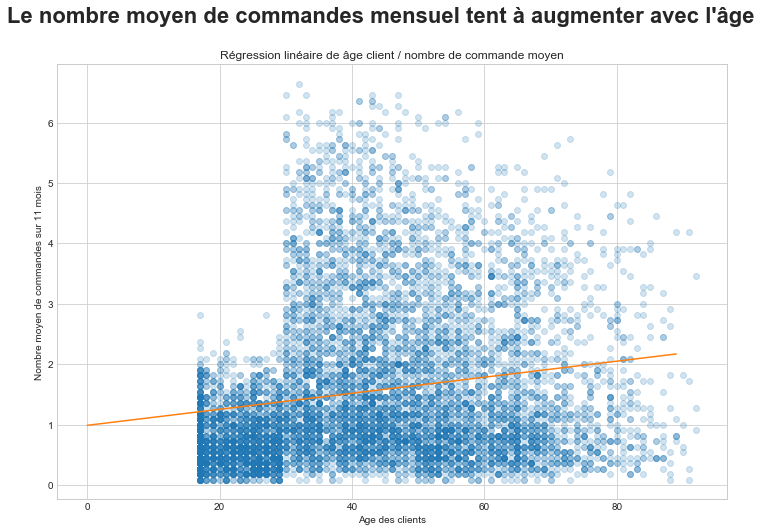

In [52]:
Y = df_session_clients['moy_cmdes_mois']
X = df_session_clients[['age_client']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age_client'],result.params['intercept']

fig=plt.figure(figsize=(12,8))
ax = plt.axes()

ax = ax.set(xlabel="Age des clients", ylabel="Nombre moyen de commandes sur 11 mois")
plt.plot(df_session_clients['age_client'], df_session_clients['moy_cmdes_mois'], 'o', alpha=0.2)
plt.plot(np.arange(90), [a*x+b for x in np.arange(90)])

plt.suptitle("Le nombre moyen de commandes mensuel tent à augmenter avec l'âge", fontsize=22, fontweight='bold')
plt.title("Régression linéaire de âge client / nombre de commande moyen", fontsize = 12, loc='center')

plt.show()
#Sauvegarde en PNG
fig.savefig('graph/21_reglin_age_moycmdes.png')
plt.close(fig)

In [53]:
# Calcul du coefficient de corrélation linéaire (Pearson)
r = st.pearsonr(df_session_clients['age_client'],df_session_clients['moy_cmdes_mois'])[0]
print('r =', round(r,3))

r = 0.175


In [54]:
# Coefficient de détermination R² (% de variation expliquée)
r_2 = r**2
print('r² =', round(r_2,3))

r² = 0.03


In [55]:
# Détail du r² par tranche d'âge
df_corr_age_moy = pd.DataFrame(columns = ["Tranche d'âge", "r", "r²"])
i = 1
for tra in df_session_clients['tranche_age'].unique():
    subset = df_session_clients[df_session_clients['tranche_age'] == tra]
    r = st.pearsonr(subset['age_client'],
                    subset['moy_cmdes_mois'])[0]
    r_2 = r**2
    df_corr_age_moy.loc[i] = [tra, r, r_2]
    i = i+1
df_corr_age_moy

,Tranche d'âge,r,r²
1,Plus de 55 ans,-0.046599,0.002171
2,Moins de 35 ans,0.408461,0.166841
3,35 à 55 ans,-0.120807,0.014594


<div class="alert alert-block alert-info">
    <b>Info :</b> Le coefficient de Pearson (r) nous permet de démontrer une corrélation modérée entre l'âge du client et la moyenne mensuelle du nombre d'achats, principalement pour la tranche des moins de 35 ans.
</div>

### Age des clients / taille du panier moyen (nombre d'articles)

In [56]:
df_prod_ventes = df_ventes[['client_id','session_id','age_client','tranche_age','id_prod']].groupby(['client_id','session_id','age_client','tranche_age']).count().reset_index()
df_prod_ventes.head()

,client_id,session_id,age_client,tranche_age,id_prod
0,c_1,s_114737,66.0,Plus de 55 ans,5
1,c_1,s_120172,66.0,Plus de 55 ans,2
2,c_1,s_134971,66.0,Plus de 55 ans,1
3,c_1,s_136532,66.0,Plus de 55 ans,1
4,c_1,s_139610,66.0,Plus de 55 ans,1


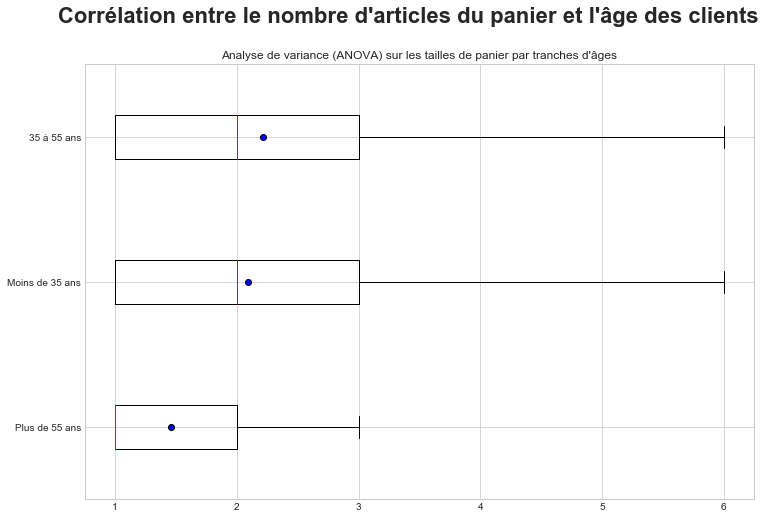

In [57]:
X = 'tranche_age' # Qualitative
Y = 'id_prod' # Quantitative

modalites = df_prod_ventes[X].unique()
groupes = []

for m in modalites:
    groupes.append(df_prod_ventes[df_prod_ventes[X]==m][Y])
        
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'blue'}

fig=plt.figure(figsize=(12,8))
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=False, showmeans=True, meanprops=meanprops)
plt.suptitle("Corrélation entre le nombre d'articles du panier et l'âge des clients", 
  fontweight='bold', 
  fontsize=22)
plt.title("Analyse de variance (ANOVA) sur les tailles de panier par tranches d'âges", 
  loc='center', 
  fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/22_anova_ages_artpanier.png')
plt.close(fig)

In [58]:
print("Le rapport de corrélation tranches d'âge / taille du panier de commande est de",
      str(round(eta_squared(df_prod_ventes[X],df_prod_ventes[Y]),3)))

Le rapport de corrélation tranches d'âge / taille du panier de commande est de 0.059


<div class="alert alert-block alert-info">
    <b>Info :</b> Le coefficient Eta-2 calculé sur le couple âge clients / taille du panier en nombre d'articles ne permet pas d'indiquer de corrélation.
</div>

### Age des clients / catégories de produits achetés

In [59]:
tab_cont_age = df_ventes[['tranche_age','categ']].pivot_table(index='tranche_age', columns='categ', aggfunc=len,margins=True,margins_name="Total")
tab_cont_age

categ,0.0,1.0,2.0,Total
tranche_age,,,,
35 à 55 ans,114101,47229,609,161939
Moins de 35 ans,41169,23816,13651,78636
Plus de 55 ans,22586,30009,438,53033
Total,177856,101054,14698,293608


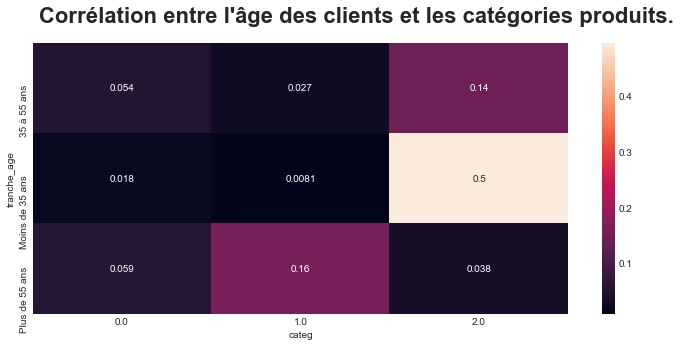

In [60]:
tx = tab_cont_age.loc[:,["Total"]]
ty = tab_cont_age.loc[["Total"],:]
n = len(df_ventes)
indep = tx.dot(ty) / n

c = tab_cont_age.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

fig = plt.figure(figsize = (12,5))
sns.heatmap(table.iloc[:-1,:-1],annot=True)

plt.suptitle("Corrélation entre l'âge des clients et les catégories produits.", 
  fontweight='bold', 
  fontsize=22)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph/23_chi2_ages_catproduits.png')
plt.close(fig)

In [61]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(tab_cont_age)
st_p

0.0

In [62]:
st_chi2

48340.44232881091

<div class="alert alert-block alert-info">
    <b>Info :</b> Les Chi-2 répartis dans le tableau de contingence n'indiquent pas de corrélation particulière entre l'âge des clients et la catégorie d'articles commandés. On peut cependant voir par exemple que les clients de moins de 35 ans ont plus tendence à commander des produits de catégorie 2.
</div>